In [7]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def phase_add(a, b):
    a_ = np.cos(a) + np.sin(a)*1j
    b_ = np.cos(b) + np.sin(b)*1j
    return np.angle(a_*b_)

def phase_statics(X):
    a = 0
    for x in X: a += ( np.cos(x) + np.sin(x)*1j)
    a /= len(X)
    return np.angle(a), 1-np.abs(a)

def getAngleDensityMap(hist_phase, size = 512):
    img = np.zeros([size, size])
    center = [size / 2, size/2]
    print hist_phase
    for i in range(size): # y 
        for j in range(size): # x
            pos = ( j - center[1] ) + 1j*( i - center[0] )
            if np.abs(pos) < size / 2:
                img[i,j] = hist_phase[int( - ( np.angle( pos ) + np.pi ) / (0.1*np.pi) )]
    return img


In [9]:
data_dir = "/Volumes/HD-PLFU3/AnalysisResult/"
df_path = "/Users/tomii/tmp/AnalysisResult/pv_stim_pandas.csv"
winrad = 4

In [10]:
df = pd.read_csv(df_path)
data = np.zeros([len(df), 3])
for i in range(len(df)):
    s = df.loc[i,:]    
    sess_dir = data_dir+"{0}/C001H001S{1:0>4}/".format(s.sample, s.session)
    #print i, sess_dir
    
    pmap_data = np.load(sess_dir+'/pmap.npy')
    
    phases = pmap_data[s.frame_start, s.stim_x - winrad:s.stim_x+winrad, s.stim_y - winrad:s.stim_y+winrad]
    phases = phases.flatten()
    stim_point_phase, _ = phase_statics(phases)
    stim_point_angle = np.angle((s.stim_x - s.pre_x) + 1j*(s.stim_y - s.pre_y)) - s.fb_angle
    shift = np.abs(((s.pst_x - s.pre_x) + 1j*(s.pst_y - s.pre_y)))
    
    d = np.array([stim_point_phase, stim_point_angle, shift])
    data[i,:] = d
    print i, s.sample, s.session, d

0 20140911-2 8 [ 1.23525972 -2.08003501  8.60232527]
1 20140911-2 14 [  0.63330154   0.93936247  17.88854382]
2 20140911-2 15 [ 0.78260306 -2.96347845  7.07106781]
3 20140911-2 17 [ -0.42930068  -3.4646085   13.34166406]
4 20140911-2 34 [ 0.98019815 -2.03245191  2.23606798]
5 20140911-2 35 [  1.08595941  -2.21556272  38.94868419]
6 20140911-2 36 [ -0.46645058  -3.08410212  13.15294644]
7 20140911-2 38 [  0.41995919   0.2943393   15.5241747 ]
8 20160907-3 6 [ -1.00477474  -4.09834636  14.14213562]
9 20160907-3 10 [  2.60706737  -1.59361519  24.59674775]
10 20160907-3 11 [-2.48086182 -4.03572208  3.60555128]
11 20160907-3 17 [-2.84469657 -1.45209099  9.48683298]
12 20160907-3 22 [  1.17900728  -0.76977443  34.6554469 ]
13 20161019-1 18 [-2.71337265 -2.64152391  5.        ]
14 20161019-1 19 [ -1.71351379  -3.31626485  23.70653918]
15 20161019-2 6 [ -1.96593969  -2.2794226   38.05259518]
16 20161019-2 7 [  1.42222355  -2.66070537  27.31300057]
17 20161019-2 8 [  0.30489778  -2.53086669  24

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [11]:
print df.loc[list(np.where(data[:,0]   <  -0.5*np.pi )[0]), ["sample", "session", "frame_start"]]
print data[np.where(data[:,0]   <  -0.5*np.pi ), :]

        sample  session  frame_start
10  20160907-3       11          400
11  20160907-3       17          360
13  20161019-1       18          370
14  20161019-1       19          370
15  20161019-2        6          170
18  20161019-2        9          190
27  20161019-2       18          190
28  20161019-2       19          200
29  20161019-2       20          210
35  20161019-3       25          255
[[[ -2.48086182  -4.03572208   3.60555128]
  [ -2.84469657  -1.45209099   9.48683298]
  [ -2.71337265  -2.64152391   5.        ]
  [ -1.71351379  -3.31626485  23.70653918]
  [ -1.96593969  -2.2794226   38.05259518]
  [ -2.93230223  -1.9513027   35.05709629]
  [ -2.80538421  -3.32144615   7.28010989]
  [ -2.42557414  -3.4276441    3.60555128]
  [ -1.66214547  -3.60524026   4.47213595]
  [ -2.04189594   0.55575572  25.8069758 ]]]


/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


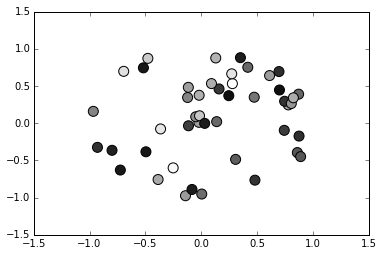

In [12]:
#thre = np.max(data[:,2])*0.5
thre = np.mean(data[:,2])

x =  np.cos(data[:,0])
y = np.sin(data[:,0])
x *= np.absolute(np.cos(data[:,1]))
y *= np.absolute(np.cos(data[:,1]))

#rgb = (np.c_[data[:,2], data[:,2], data[:,2]] > thre)*1.0
rgb = np.c_[data[:,2], data[:,2], data[:,2]] / np.max(data[:,2])
#rgb[:,1] = 0.0
#rgb[:,2] = 1-rgb[:,0]

fig, ax = plt.subplots()
ax.scatter(x, y, s=100, facecolors=rgb)
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
plt.show()

In [15]:
np.cos(2.0)

-0.41614683654714241

In [14]:
np.max(data[:,2])

38.948684188300895